In [1]:
import cv2
import os
import glob
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
home_path = os.path.join(os.getenv('HOME'), 'aiffel/sia_gis/data/buildings/training')
data_path = os.path.join(home_path, 'raw')

In [4]:
img_src = os.path.join(data_path, 'BLD00001_PS3_K3A_NIA0276.png')
img_src

'/home/aiffel-d34j/aiffel/sia_gis/data/buildings/training/raw/BLD00001_PS3_K3A_NIA0276.png'

In [9]:
# src = cv2.imread(img_src, cv2.IMREAD_GRAYSCALE)
src = cv2.imread(img_src, cv2.IMREAD_COLOR)

src.shape

(1024, 1024, 3)

In [10]:
import numpy as np
import cv2

def clahe(img_src):
    # 이미지 읽기
    src = cv2.imread(img_src, cv2.IMREAD_COLOR)  # 칼라 이미지의 경우

    # bgr 색공간 이미지를 lab 색공간 이미지로 변환
    lab = cv2.cvtColor(src, cv2.COLOR_BGR2LAB)

    # l, a, b 채널 분리
    l, a, b = cv2.split(lab)

    # CLAHE 객체 생성 : contrast limited adaptive histogram equalization
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8, 8))

    # CLAHE 객체에 l 채널 입력하여 CLAHE가 적용된 l 채널 생성 
    l = clahe.apply(l)

    # l, a, b 채널 병합
    lab = cv2.merge((l, a, b))

    # lab 색공간 이미지를 bgr 색공간 이미지로 변환
    cont_dst = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    
    return src, cont_dst


    
src, cont_dst = clahe(img_src)    

# # 원본, 대비 증가 이미지 화면 출력
# cv2.imshow('orgin', src)
# cv2.imshow('Increased contrast', cont_dst)

# # 화면 출력창 대기/닫기
# cv2.waitKey(0)              # 아무키나 누르면
# cv2.destroyAllWindows()     # 모든 창 닫기

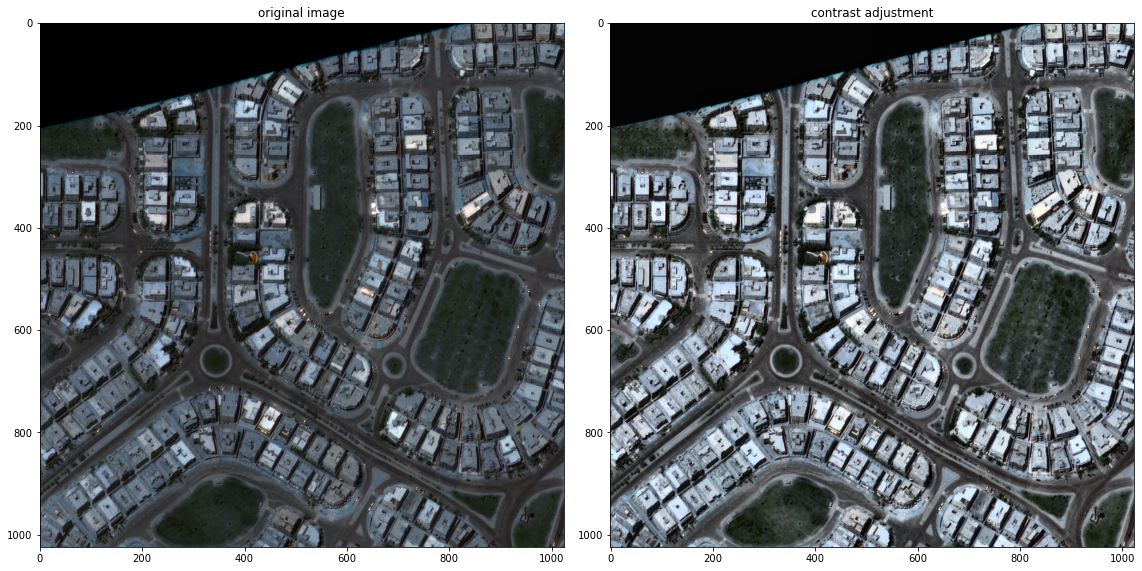

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(cont_dst)
ax2.set_title('contrast adjustment')
plt.tight_layout()
plt.show()

In [13]:
import numpy as np
import cv2

def clahe(img_src):
    # 이미지 읽기
    src = cv2.imread(img_src, cv2.IMREAD_GRAYSCALE)   # 흑백 이미지의 경우

    # CLAHE 객체 생성 : contrast limited adaptive histogram equalization
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8, 8))

    # CLAHE가 적용된 이미지 생성 
    cont_img = clahe.apply(src)
    
    return src, cont_img

src, cont_dst = clahe(img_src) 

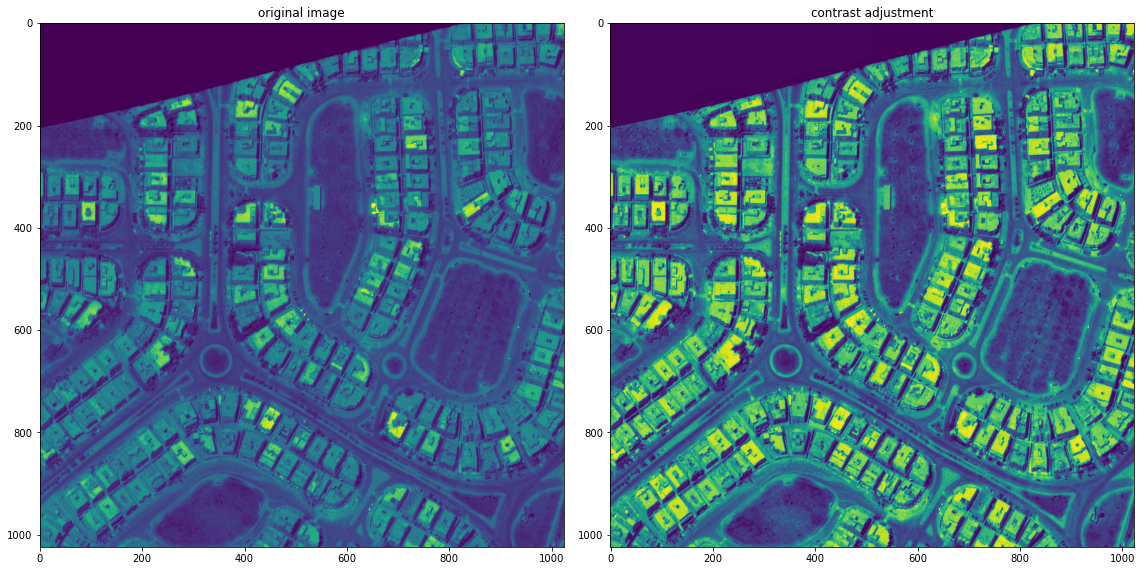

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(src)
ax1.set_title('original image')
ax2.imshow(cont_dst)
ax2.set_title('contrast adjustment')
plt.tight_layout()
plt.show()

* [OpenCV - Python 컬러 이미지 대비 조정](https://velog.io/@oosiz/OpenCV-Python-컬러-이미지-대비-조정)
* [OpenCV - CIELAB 색 공간](https://ko.wikipedia.org/wiki/CIELAB_색_공간)
  - `L*` 값은 밝기, 
    - L* = 0 이면 검은색이며, L* = 100 이면 흰색을 나타낸다
  - `a*`은 빨강과 초록 중 어느쪽으로 치우쳤는지를 나타낸다
    - `a*`이 음수이면 초록에 치우친 색깔이며, 양수이면 빨강/보라 쪽으로 치우친 색깔이다
  - `b*`은 노랑과 파랑을 나타낸다. b*이 음수이면 파랑이고 b*이 양수이면 노랑이다  
  
* [OpenCV - Color conversions](https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html)

* [OpenCV - CLAHE](https://blog.naver.com/samsjang/220543360864)
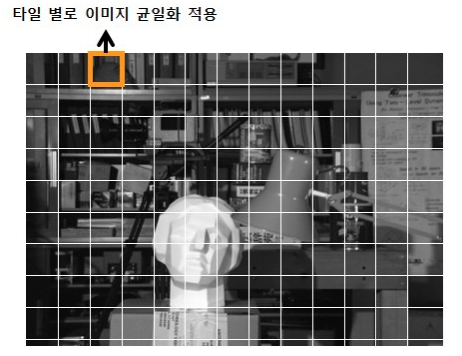
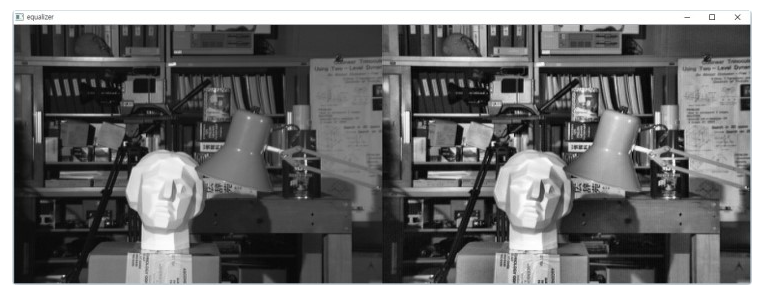

* [참고: OpenCV - 5. 창 관리 및 이벤트 처리](https://bkshin.tistory.com/entry/OpenCV-5-창-관리-및-이벤트-처리)
* [OpenCV - 컴퓨터 비전 애플리케이션을 개발하기 위한 오픈소스 라이브러리](https://gist.github.com/Curookie/a2f069522c90ab9947d687778cfa7536)

* [Brightness(밝기)와 Contrast 조절](https://swprog.tistory.com/entry/Image-processing-Brightness-Contrast-밝기-대비)
* [OpenCV - 영상 명암 대비 조절하기](https://blog.naver.com/qbxlvnf11/221288082020)
* [[파이썬 OpenCV] 영상의 명암비 조절 - 히스토그램 스트레칭, 정규화](https://deep-learning-study.tistory.com/121)
* 